In [50]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [51]:
import numpy as np
import tensorflow as tf                            # tensorflow 기본 import
from tensorflow.keras.models import Sequential     # model box 구성
from tensorflow.keras.layers import Flatten, Dense # model 안의 input layer와 output layer를 구성
from tensorflow.keras.optimizers import SGD        # 알고리즘 담당
from sklearn.model_selection import train_test_split # train Data,Test Data 분리
from sklearn.preprocessing import MinMaxScaler     # 데이터 정규화
# 컴퓨터는 큰 숫를 작은 수로
# 변경 0~1 사이 실수 값으로 변경

In [52]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [53]:
cols = df.keys()
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [54]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [55]:
df.shape

(768, 9)

In [56]:
x_data = df.drop('Pregnancies',axis=1 ,inplace=False)
y_data = df['Pregnancies']

In [57]:
x_data.shape

(768, 8)

In [58]:
y_data.shape

(768,)

In [59]:
scaler = MinMaxScaler()
scaler.fit(x_data)
norm_x_data = scaler.transform(x_data)
print(norm_x_data)

[[0.74371859 0.59016393 0.35353535 ... 0.23441503 0.48333333 1.        ]
 [0.42713568 0.54098361 0.29292929 ... 0.11656704 0.16666667 0.        ]
 [0.91959799 0.52459016 0.         ... 0.25362938 0.18333333 1.        ]
 ...
 [0.6080402  0.59016393 0.23232323 ... 0.07130658 0.15       0.        ]
 [0.63316583 0.49180328 0.         ... 0.11571307 0.43333333 1.        ]
 [0.46733668 0.57377049 0.31313131 ... 0.10119556 0.03333333 0.        ]]


In [60]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [61]:
model = Sequential()

In [62]:
model.add(Flatten(input_shape=(8,)))
model.add(Dense(256, activation="tanh"))
model.add(Dense(128, activation="tanh"))
model.add(Dense(256, activation="tanh"))
model.add(Dense(256, activation="tanh"))
model.add(Dense(256, activation="tanh"))
model.add(Dense(256, activation="tanh"))
model.add(Dense(256, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 8)                 0         
                                                                 
 dense_16 (Dense)            (None, 256)               2304      
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 256)               33024     
                                                                 
 dense_19 (Dense)            (None, 256)               65792     
                                                                 
 dense_20 (Dense)            (None, 256)               65792     
                                                                 
 dense_21 (Dense)            (None, 256)              

In [64]:
model.compile(optimizer=SGD(learning_rate=0.001),
             loss="mse",
             metrics=['accuracy']
             )

In [65]:
hist = model.fit(norm_x_data,
                y_data,
                epochs=1000,
                verbose=1,
                validation_split=0.2
                )

Epoch 1/1000
20/20 [==============================] - 1s 13ms/step - loss: 21.1964 - accuracy: 0.1824 - val_loss: 22.4106 - val_accuracy: 0.1818
Epoch 2/1000
20/20 [==============================] - 0s 5ms/step - loss: 19.9109 - accuracy: 0.1743 - val_loss: 21.6224 - val_accuracy: 0.1818
Epoch 3/1000
20/20 [==============================] - 0s 4ms/step - loss: 19.4437 - accuracy: 0.1743 - val_loss: 21.3677 - val_accuracy: 0.1818
Epoch 4/1000
20/20 [==============================] - 0s 5ms/step - loss: 19.2760 - accuracy: 0.1743 - val_loss: 21.2590 - val_accuracy: 0.1818
Epoch 5/1000
20/20 [==============================] - 0s 4ms/step - loss: 19.1974 - accuracy: 0.1743 - val_loss: 21.2016 - val_accuracy: 0.1818
Epoch 6/1000
20/20 [==============================] - 0s 5ms/step - loss: 19.1530 - accuracy: 0.1743 - val_loss: 21.1668 - val_accuracy: 0.1818
Epoch 7/1000
20/20 [==============================] - 0s 4ms/step - loss: 19.1247 - accuracy: 0.1743 - val_loss: 21.1446 - val_accuracy

In [66]:
print(model.evaluate(norm_x_data, y_data))

24/24 [==============================] - 0s 2ms/step - loss: 19.4339 - accuracy: 0.1758
[19.43385887145996, 0.17578125]


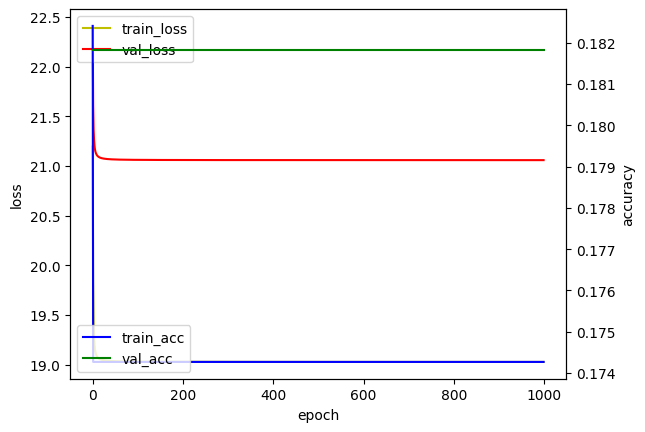

In [67]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")

acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")